# Bell's inequality

## Derivation of Bell's inequality

Imagine we conduct the following experiment. Charlie prepares two particles, one of which he sends to Alice and the other to Bob.  
Alice measures the particle as soon as she receives it. Let's say she has two different measuring devices, so she can choose one of two different measurement methods. The physical properties of these measurements are labeled $P_Q$ and $P_R$, respectively. Alice will randomly select a method to measure after receiving the particles. For simplicity, let's assume that the measurement can be $+1$ or $-1$. Suppose Alice's particle pair property $P_Q$ has a value $Q$. $Q$ is assumed to be an objective property of the Alice particle revealed only by measurement. Similarly, let $R$ represent the value obtained by the measurement property $P_R$.  
Similarly, suppose Bob can measure one of two attributes $P_S$ and $P_T$, and get the objectively existing attribute values $S$ and $T$, respectively, with values of $+1$ or $-1$. Bob randomly chooses a way to measure the particles after receiving them. The experiment arranged for Alice and Bob to take measurements at the same time (or, in the language of relativity, in a way that had no causal connection). Since the propagation speed of physical influence cannot exceed the speed of light, Alice and Bob's measurement results do not interfere with each other.  
We are going to do some simple algebra with the quantity $QS+RS+RT-QT$. Notice that
$$ QS+RS+RT-QT=(Q+R)S+(R-Q)T. $$
Because $R,Q=±1$, either $(Q+R)S = 0$, or $(R-Q)T = 0$. It is easy to see from the above equation that for each case, there is $ QS + RS + RT - QT = ±2 $. The probability of being in the state $Q = q, R = r, S = s, T = t$ before the measurement is $p(q,r,s,t)$. Order $E(·) $ represents the mean of the quantity, then we have
$$ E(QS)+E(RS)+E(RT)-E(QT)=E(QS+RS+RT-QT)=\sum_{qrst}p(q,r,s,t)(qs+rs+rt-qt)\leq\sum_{qrst}p(q,r,s,t) \times 2 = 2$$
This leads to Bell's inequality:
$$ E(QS)+E(RS)+E(RT)-E(QT)\leq 2 $$
By repeating the experiment several times, Alice and Bob can determine each quantity to the left of Bell's inequality and thus check whether it holds true in the actual experiment.

## Violation of Bell’s inequality by quantum entanglement

Imagine we perform the following quantum mechanical experiment. Charlie prepares a quantum system of two qubits in the state
$$ | \psi\rangle =cos{\frac{\theta}{2}}|01\rangle + sin{\frac{\theta}{2}}|10\rangle,\quad\theta\in[0,2\pi). $$
He sends the first qubit to Alice and the second to Bob. They perform measurements of the following observables:
$$ Q = Z_1,R = X_1 ,S = \frac{-Z_2-X_2}{\sqrt{2}},T = \frac{Z_2-X_2}{\sqrt{2}}. $$
where $Z=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix},X=\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}$.  
Simple calculations show that the average values for these observables, written in the quantum mechanical $\langle \cdot \rangle$ notation, are:
$$ \langle QS \rangle=\frac{1}{\sqrt{2}},\langle RS \rangle = -\frac{1}{\sqrt{2}}sin\theta,\langle RT\rangle=\frac{1}{\sqrt{2}},\langle QT\rangle=\frac{1}{\sqrt{2}}sin\theta. $$
Thus,
$$ \langle QS \rangle+\langle RS \rangle+\langle RT \rangle-\langle QT \rangle =\sqrt{2}-\sqrt{2}sin\theta. $$
When $\theta$ takes some specific angle, the above equation violates Bell's inequality, and we will demonstrate this by pyquafu below.

## Build the circuit

### Create entangled state

First we define a function to create an entangled state of 2-qubits, changing the quantum state from $|00 \rangle$ to $|\psi\rangle =cos{\frac{\theta}{2}}|01\rangle + sin{\frac{\theta}{2}}|10\rangle$, $\theta\in[0,2pi)$.

In [1]:
from quafu import QuantumCircuit, simulate, Task
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin, sqrt

def create_state(theta = 1.25*pi ):
    """ 构造一个2量子比特的纠缠态
    |00> --> |ψ> = cos(θ/2)|01> + sin(θ/2)|10> θ∈[0,2pi)"""
    qc = QuantumCircuit(2)
    qc.ry(0, theta)
    qc.x(1)
    qc.cnot(0,1)
    return qc

### Change measure bases

The eigenstates of the eigenvalue of 1 for measuring operator $S=\frac{-Z-X}{\sqrt{2}}=\begin{pmatrix} -\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{pmatrix}$ is $ |v_+\rangle=-\frac{1}{\sqrt{4+2\sqrt{2}}} |0\rangle+\frac{1+\sqrt{2}}{\sqrt{4+2\sqrt{2}}}|1\rangle$, while the eigenstates of the eigenvalue of 1 for measuring operator $T=\frac{Z-X}{\sqrt{2}}=\begin{pmatrix} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\end{pmatrix}$ is $ |u_+\rangle=-\frac{1+\sqrt{2}}{\sqrt{4+2\sqrt{2}}}|0\rangle+\frac{1}{\sqrt{4+2\sqrt{2}}}|1\rangle$.   
Define functions for rotating the measurement base so that individual circuits can measure the expectations of the operator QS, RS, RT, QT.

In [2]:
phi1 = np.arccos(-1/sqrt(4+2*sqrt(2)))  # Used to rotate to the eigenstate corresponding to eigenvalue 1 of the S operator
phi2 = np.arccos(-(1+sqrt(2))/sqrt(4+2*sqrt(2)))  # Used to rotate to the eigenstate corresponding to eigenvalue 1 of the T operator

def QS(theta):
    qc = create_state(theta)
    qc.ry(1,-phi1*2)  # Change the measure bases of the second qubit to the eigenstates of S
    return qc
def RS(theta):
    qc = create_state(theta)
    qc.ry(0,-pi/2)  # Change the measure bases of the first qubit to the eigenstates of R
    qc.ry(1,-phi1*2)  # Change the measure bases of the second qubit to the eigenstates of S
    return qc
def RT(theta):
    qc = create_state(theta)
    qc.ry(0,-pi/2)  # Change the measure bases of the first qubit to the eigenstates of R
    qc.ry(1,-phi2*2)  # Change the measure bases of the second qubit to the eigenstates of T
    return qc
def QT(theta):
    qc = create_state(theta)
    qc.ry(1,-phi2*2)  # Change the measure bases of the second qubit to the eigenstates of T
    return qc
Circuit = [QS,RS,RT,QT]
Circuit_name = ['QS','RS','RT','QT']

### Create the demo task

Then we define the main function for demonstration. It has two parameters, `theta_num` is used to determine the number of theta values, `experimental` is used to select the operation on real machine or simulator. The function will take `theta_num` theta values uniformly in the interval $[0,2\pi)$ for measurement, and place the measured expection $\langle QS \rangle,\langle RS \rangle,\langle RT \rangle$ and $\langle QT \rangle$ in `obsexp`.  
The function has three return parameters, `theta`, `obsexp`, `experimental`, which respectively represent the taken theta value, corresponding four expectations and whether it is running on real machine or simulator. Besides, if running on a real machine, the function will show the history of the task, and you can save it for later viewing.

In [3]:
def Bell_inequality_demo(theta_num = 5, experimental: bool = False):
    theta_step=2*pi/theta_num  
    theta=[]  # To save the value of theta
    obsexp=[]  # To save the value of E(QS),E(RS),E(RT),E(QT)
    name=["θ={:.3f}*pi".format(i*theta_step/pi)  for i in range(theta_num)]  # Name of each task
    groupname="Bell_inequality"  # Name of group
    task = Task()  # Create and configure task
    shots_num = 2000
    backend = "ScQ-P10"  # ScQ-P10, ScQ-P18, ScQ-P136
    task.config(backend=backend, shots=shots_num, compile=True)
    for i in range(theta_num):
        theta_i = i*theta_step
        sub_obsexp=[] # To save the value of E(QS),E(RS),E(RT),E(QT) in this loop
        for j in range(4):  # Traverse the corresponding circuits of the four measurement operators
            qc = Circuit[j](theta_i)
            if experimental:
                print("θ={:.3f}*pi, {}, sending task...".format(theta_i/pi,Circuit_name[j]))
                sub_res = task.send(qc, name=','.join([name[i],Circuit_name[j]]), group=groupname)
                sub_obsexp.append(sub_res.calculate_obs([0,1]))
            else:
                simu_res = simulate(qc)
                sub_obsexp.append(simu_res.calculate_obs([0,1]))
        print('θ={:.3f}*pi, E(QS) ={:.6f}, E(RS) ={:.6f}, E(RT)={:.6f}, E(QT)={:.6f}'.format(theta_i/pi,*sub_obsexp))
        theta.append(theta_i)
        obsexp.append(sub_obsexp)
    if experimental:
        history=task.get_history()
        print(history)  # Save the history to disk if you want to retrieve it next time
    return theta,obsexp,experimental

## Show the result

To show the theoretical curve, we take 100 theta values uniformly in the interval $[0,2\pi)$ and calculate its theoretical value.

In [4]:
def Theoretical_value(theta):
    return np.sqrt(2)*(1-sin(theta))  # E(QS)+E(RS)+E(RT)-E(QT)
x = np.linspace(0, 2*pi, 100)
y = Theoretical_value(x)

In [5]:
def Plot_theoretical_value(x,y):
    plt.plot(x, y, label="Theoretical value: sqrt(2)*(1-sin(θ))")
    plt.xlabel("theta")
    plt.ylabel("E(QS)+E(RS)+E(RT)-E(QT)")
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.17))

### Simulation result

θ=0.000*pi, E(QS) =0.707107, E(RS) =0.000000, E(RT)=-0.000000, E(QT)=-0.707107
θ=0.250*pi, E(QS) =0.707107, E(RS) =-0.500000, E(RT)=-0.500000, E(QT)=-0.707107
θ=0.500*pi, E(QS) =0.707107, E(RS) =-0.707107, E(RT)=-0.707107, E(QT)=-0.707107
θ=0.750*pi, E(QS) =0.707107, E(RS) =-0.500000, E(RT)=-0.500000, E(QT)=-0.707107
θ=1.000*pi, E(QS) =0.707107, E(RS) =0.000000, E(RT)=-0.000000, E(QT)=-0.707107
θ=1.250*pi, E(QS) =0.707107, E(RS) =0.500000, E(RT)=0.500000, E(QT)=-0.707107
θ=1.500*pi, E(QS) =0.707107, E(RS) =0.707107, E(RT)=0.707107, E(QT)=-0.707107
θ=1.750*pi, E(QS) =0.707107, E(RS) =0.500000, E(RT)=0.500000, E(QT)=-0.707107
θ=0.000*pi E(QS)+E(RS)+E(RT)-E(QT)=1.414214
θ=0.250*pi E(QS)+E(RS)+E(RT)-E(QT)=0.414214
θ=0.500*pi E(QS)+E(RS)+E(RT)-E(QT)=-0.000000
θ=0.750*pi E(QS)+E(RS)+E(RT)-E(QT)=0.414214
θ=1.000*pi E(QS)+E(RS)+E(RT)-E(QT)=1.414214
θ=1.250*pi E(QS)+E(RS)+E(RT)-E(QT)=2.414214
θ=1.500*pi E(QS)+E(RS)+E(RT)-E(QT)=2.828427
θ=1.750*pi E(QS)+E(RS)+E(RT)-E(QT)=2.414214


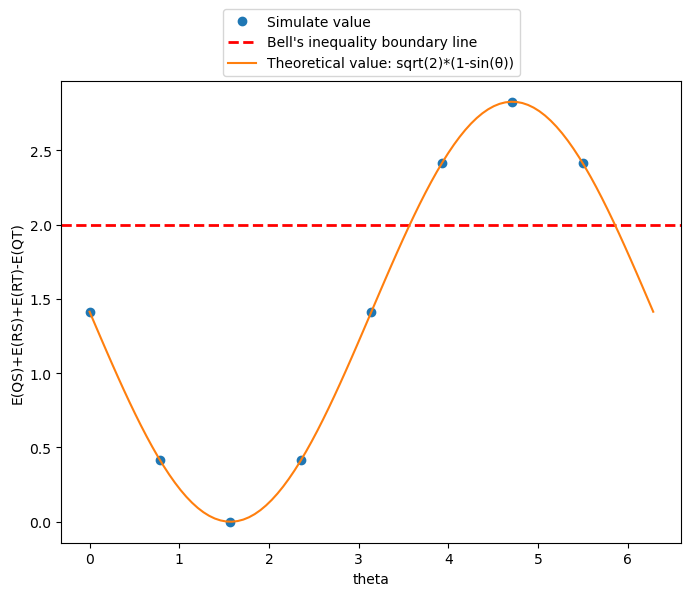

In [6]:
theta, obsexp, experimental = Bell_inequality_demo(theta_num = 8, experimental = False)
res=[obsexp[i][0] + obsexp[i][1] + obsexp[i][2] - obsexp[i][3] for i in range(len(obsexp))]  # E(QS)+E(RS)+E(RT)-E(QT)
for i in range(len(res)):
    print("θ={:.3f}*pi".format(theta[i]/pi),"E(QS)+E(RS)+E(RT)-E(QT)={:.6f}".format(res[i]))  # Show the result data
# Show the result graph
plt.figure(figsize=(8, 6)) # Set the image size
plt.plot(theta, res, "o", label="Simulate value")
plt.axhline(y=2, color='red', linestyle='--', linewidth=2)  # Draw the boundary line of Bell's inequality
plt.plot([], [], color='red', linestyle='--', linewidth=2, label='Bell\'s inequality boundary line')  # Add a legend to the boundary line of Bell's inequality
Plot_theoretical_value(x,y)
plt.show()

### Experimental result

By setting the `experimental` parameter to True, we can get results running on the real machine. And the history of the task will be shown.

θ=0.000*pi, QS, sending task...
θ=0.000*pi, RS, sending task...
θ=0.000*pi, RT, sending task...
θ=0.000*pi, QT, sending task...
θ=0.000*pi, E(QS) =0.453000, E(RS) =-0.023000, E(RT)=0.054000, E(QT)=-0.899000
θ=0.250*pi, QS, sending task...
θ=0.250*pi, RS, sending task...
θ=0.250*pi, RT, sending task...
θ=0.250*pi, QT, sending task...
θ=0.250*pi, E(QS) =0.724000, E(RS) =-0.429000, E(RT)=-0.462000, E(QT)=-0.558000
θ=0.500*pi, QS, sending task...
θ=0.500*pi, RS, sending task...
θ=0.500*pi, RT, sending task...
θ=0.500*pi, QT, sending task...
θ=0.500*pi, E(QS) =0.738000, E(RS) =-0.635000, E(RT)=-0.574000, E(QT)=-0.655000
θ=0.750*pi, QS, sending task...
θ=0.750*pi, RS, sending task...
θ=0.750*pi, RT, sending task...
θ=0.750*pi, QT, sending task...
θ=0.750*pi, E(QS) =0.819000, E(RS) =-0.428000, E(RT)=-0.542000, E(QT)=-0.498000
θ=1.000*pi, QS, sending task...
θ=1.000*pi, RS, sending task...
θ=1.000*pi, RT, sending task...
θ=1.000*pi, QT, sending task...
θ=1.000*pi, E(QS) =0.697000, E(RS) =-0.00

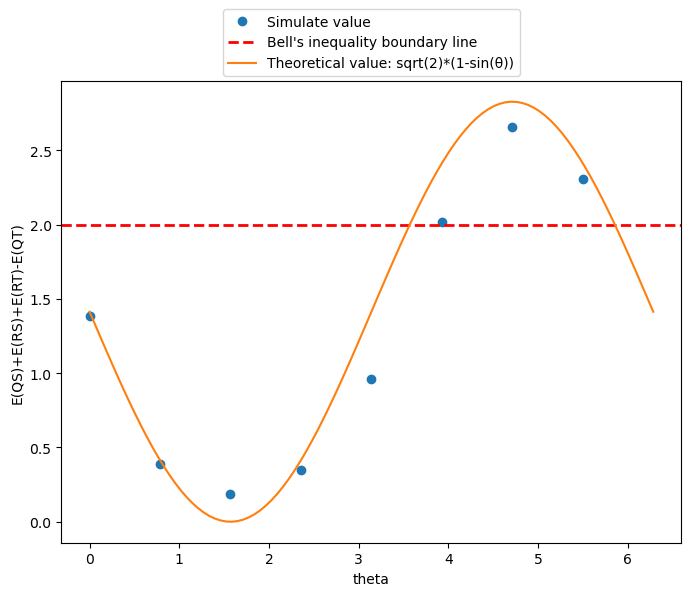

In [7]:
theta, obsexp, experimental = Bell_inequality_demo(theta_num = 8, experimental = True)
res=[obsexp[i][0] + obsexp[i][1] + obsexp[i][2] - obsexp[i][3] for i in range(len(obsexp))]  # E(QS)+E(RS)+E(RT)-E(QT)
for i in range(len(res)):
    print("θ={:.3f}*pi".format(theta[i]/pi),"E(QS)+E(RS)+E(RT)-E(QT)={:.6f}".format(res[i]))  # Show the result data
# Show the result graph
plt.figure(figsize=(8, 6)) # Set the image size
plt.plot(theta, res, "o", label="Simulate value")
plt.axhline(y=2, color='red', linestyle='--', linewidth=2)  # Draw the boundary line of Bell's inequality
plt.plot([], [], color='red', linestyle='--', linewidth=2, label='Bell\'s inequality boundary line')  # Add a legend to the boundary line of Bell's inequality
Plot_theoretical_value(x,y)
plt.show()

### Retrieve tasks

If you have saved the id of the tasks running on the real machine, you can retrieve the results in the following way.

Group:  Bell_inequality
task_id              task_name      status    
280B2F403598275E     θ=0.000*pi,QS     Completed 
280B2FD0157AE6C0     θ=0.000*pi,RS     Completed 
280B304038787B61     θ=0.000*pi,RT     Completed 
280B30D012A17474     θ=0.000*pi,QT     Completed 
280B315033C353D4     θ=0.250*pi,QS     Completed 
280B31D00E4AA933     θ=0.250*pi,RS     Completed 
280B32602E712CE8     θ=0.250*pi,RT     Completed 
280B32F0145E2838     θ=0.250*pi,QT     Completed 
280B33602B1F4E7F     θ=0.500*pi,QS     Completed 
280B33F0107879F8     θ=0.500*pi,RS     Completed 
280B347026E14713     θ=0.500*pi,RT     Completed 
280B34F00BC4B1FE     θ=0.500*pi,QT     Completed 
280B35602EF5C251     θ=0.750*pi,QS     Completed 
280B35F00AA449F8     θ=0.750*pi,RS     Completed 
280B36702D4FC6F4     θ=0.750*pi,RT     Completed 
280B36F007C1DAE6     θ=0.750*pi,QT     Completed 
280B37702A83E16D     θ=1.000*pi,QS     Completed 
280B380006F0B7D7     θ=1.000*pi,RS     Completed 
280B3870290AF53F     θ=1.000*

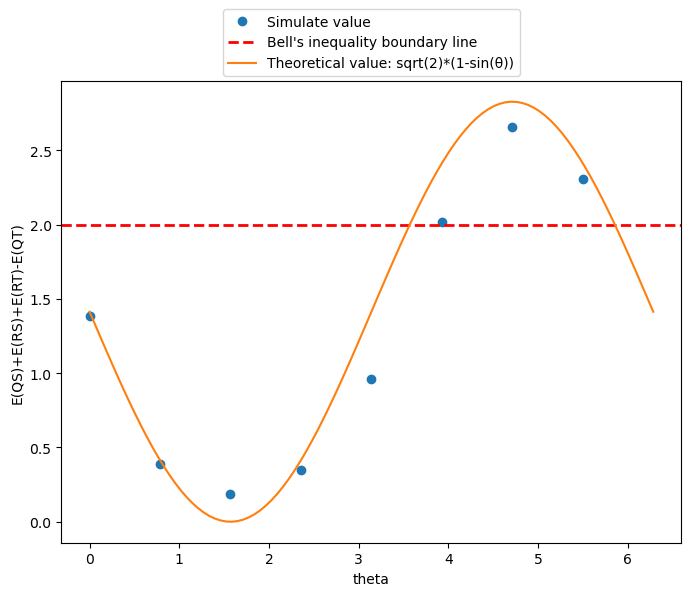

In [8]:
# Copy the history you want to retrieve into old_history. The type of the old_history is dictionary and the form is: {'group_name': ['taskid']}.
old_history={'Bell_inequality': ['280B2F403598275E', '280B2FD0157AE6C0', '280B304038787B61', '280B30D012A17474', \
'280B315033C353D4', '280B31D00E4AA933', '280B32602E712CE8', '280B32F0145E2838', '280B33602B1F4E7F', '280B33F0107879F8', \
'280B347026E14713', '280B34F00BC4B1FE', '280B35602EF5C251', '280B35F00AA449F8', '280B36702D4FC6F4', '280B36F007C1DAE6', \
'280B37702A83E16D', '280B380006F0B7D7', '280B3870290AF53F', '280B390003CB7F1D', '280B39802575EF70', '280B3A003A939B02', \
'280B3A9021CE6B3F', '280B3B1038FC6100', '280B3BA01E989C72', '280B3C3003D8F85B', '280B3CB01A20DF92', '280B3D40037C3E0C', \
'280B3DC01A418AD9', '280B3E400245C983', '280B3EB017311A72', '280B3F303833D913']}
newtask = Task()
result = newtask.retrieve_group("Bell_inequality", history=old_history)
obsexp=[]
for i in range(len(result)):
    if i % 4 == 0:
        obsexp.append([])
    obsexp[-1].append(result[i].calculate_obs([0,1]))
theta = [ i*2*pi/len(obsexp) for i in range(len(obsexp)) ]
res=[obsexp[i][0] + obsexp[i][1] + obsexp[i][2] - obsexp[i][3] for i in range(len(obsexp))]  # E(QS)+E(RS)+E(RT)-E(QT)
for i in range(len(res)):
    print("θ={:.3f}*pi".format(theta[i]/pi),"E(QS)+E(RS)+E(RT)-E(QT)={:.6f}".format(res[i]))  # Show the result data
# Show the result graph
plt.figure(figsize=(8, 6)) # Set the image size
plt.plot(theta, res, "o", label="Simulate value")
plt.axhline(y=2, color='red', linestyle='--', linewidth=2)  # Draw the boundary line of Bell's inequality
plt.plot([], [], color='red', linestyle='--', linewidth=2, label='Bell\'s inequality boundary line')  # Add a legend to the boundary line of Bell's inequality
Plot_theoretical_value(x,y)
plt.show()